In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train = pd.read_csv('Data/Black Friday/train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
print(*train.columns,sep=', ')

User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase


In [4]:
test = pd.read_csv('Data/Black Friday/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train['Source'] = 'train'
test['Source'] = 'test'
data = pd.concat([train,test])

# EDA

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Source                         object
dtype: object

In [8]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Source                             0
dtype: int64

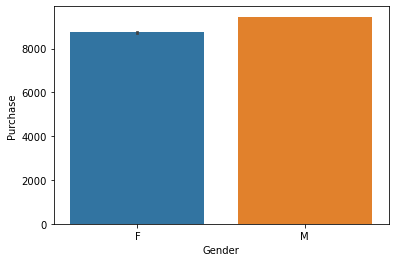

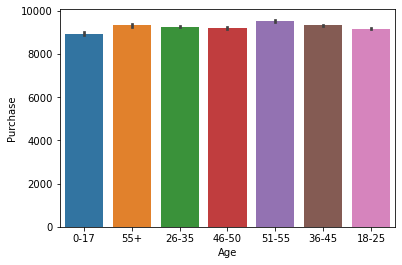

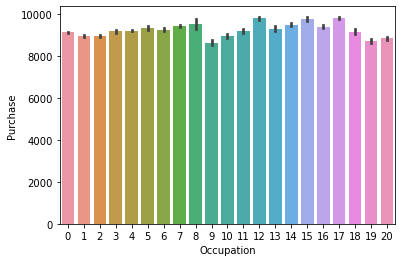

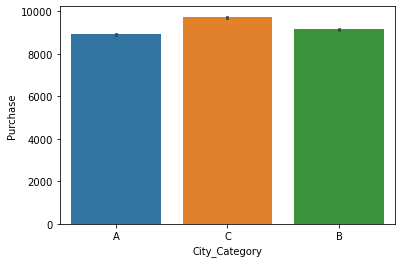

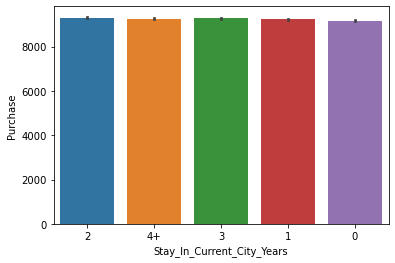

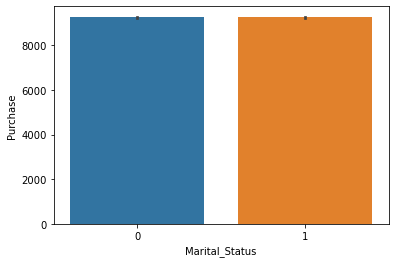

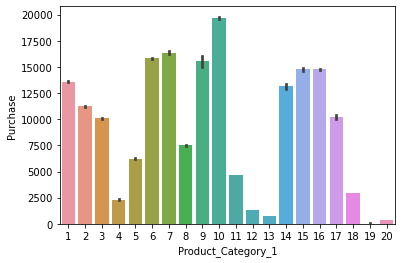

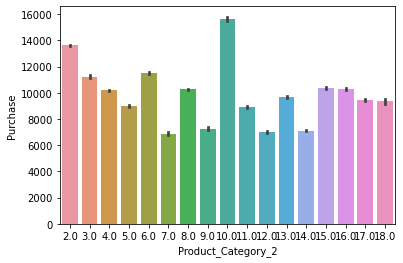

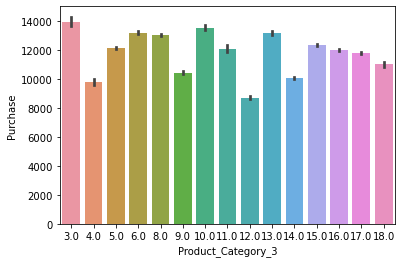

In [9]:
for i in data.columns[2:-2]:
    sns.barplot(x=i,y='Purchase',data=train,)
    plt.show()

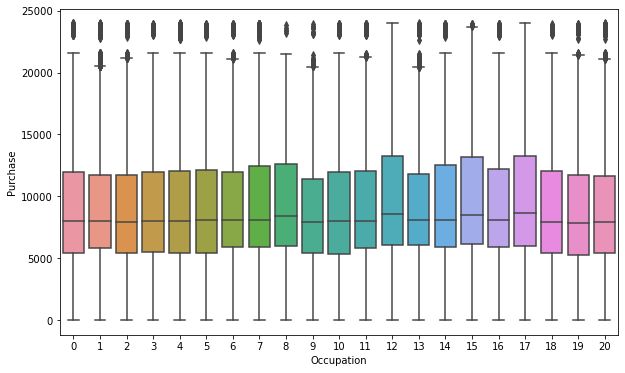

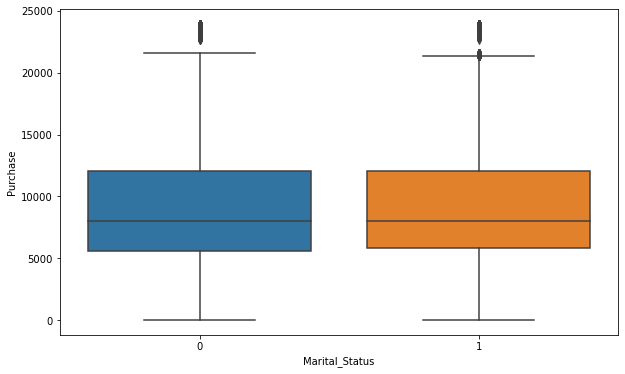

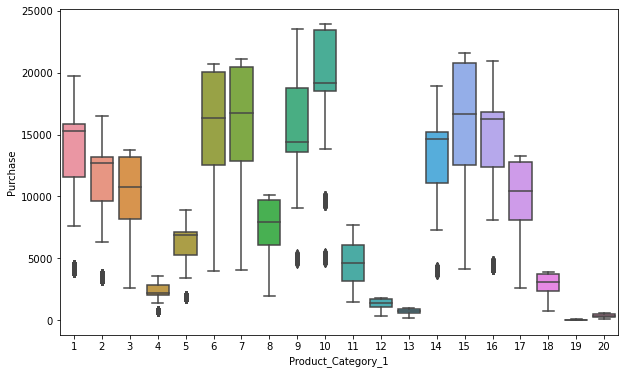

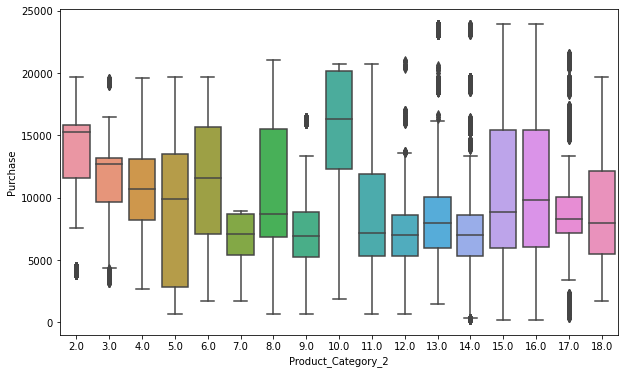

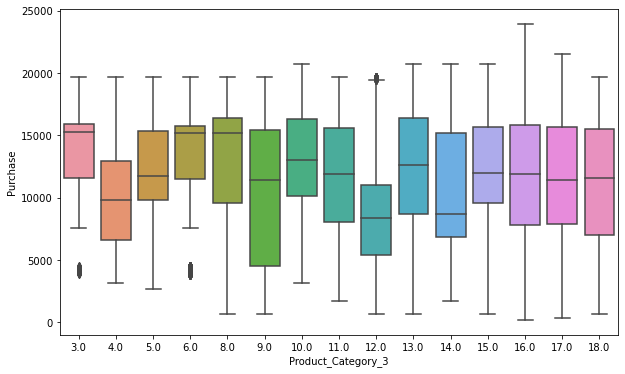

In [10]:
for i in data.select_dtypes(np.number).columns[1:-1]:
    plt.figure(figsize=(10,6))
    sns.boxplot(x = i, y='Purchase',data = train)
    plt.show()

# Data Preprocessing

**Filling Missing Values**

In [11]:
data.drop(columns = 'Product_Category_3', inplace = True) #too many missing values

In [12]:
data['Product_Category_2'].fillna(data['Product_Category_2'].mean(), inplace=True)

In [13]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
Source                             0
dtype: int64

**Label Encoding & Scaling**

In [14]:
data['Product_ID'] = data['Product_ID'].str.replace('P00','')

In [15]:
scaler = StandardScaler()
data['Product_ID'] = scaler.fit_transform(data['Product_ID'].values.reshape(-1,1))

In [16]:
for i in ['Gender','Age','City_Category']:
    data[i] = LabelEncoder().fit_transform(data[i])

In [17]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+','4').astype(int)

In [18]:
for i in data.select_dtypes('int32').columns:
    data[i] = data[i].astype(int)
data['City_Category'] = data['City_Category'].astype('category')

In [19]:
data.dtypes

User_ID                          int64
Product_ID                     float64
Gender                           int32
Age                              int32
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int32
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Purchase                       float64
Source                          object
dtype: object

In [20]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,1000001,-1.027277,0,0,10,0,2,0,3,9.844506,8370.0,train
1,1000001,0.728995,0,0,10,0,2,0,1,6.000000,15200.0,train
2,1000001,-0.843742,0,0,10,0,2,0,12,9.844506,1422.0,train
3,1000001,-0.867172,0,0,10,0,2,0,12,14.000000,1057.0,train
4,1000002,1.085326,1,6,16,2,4,0,8,9.844506,7969.0,train


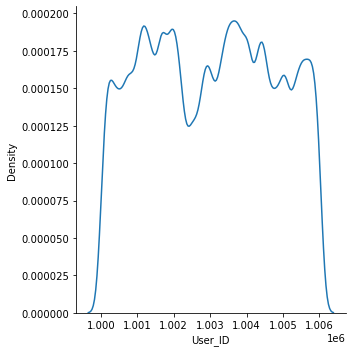

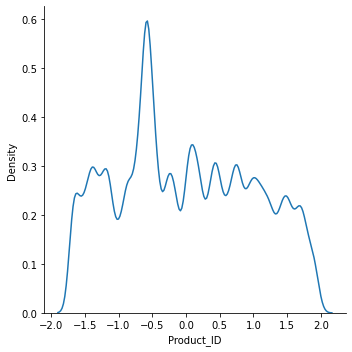

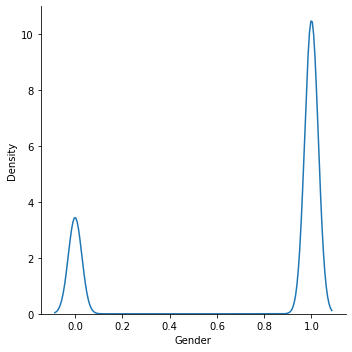

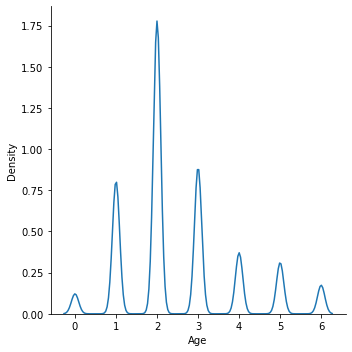

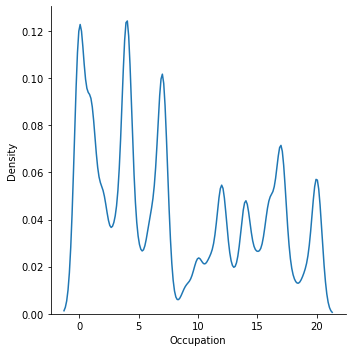

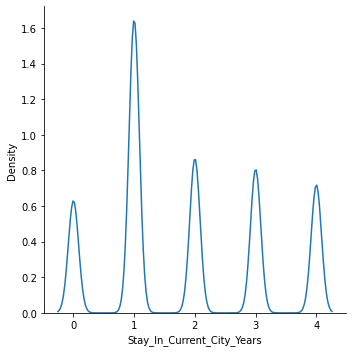

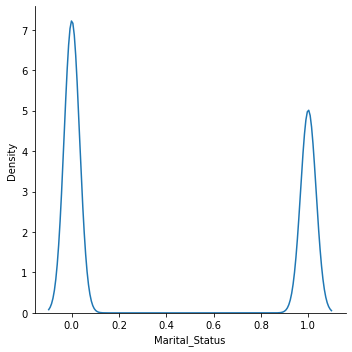

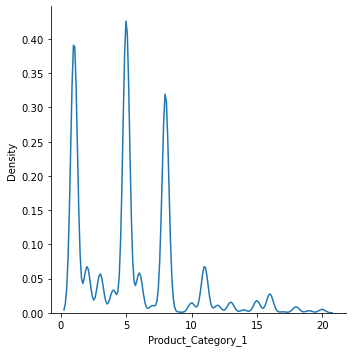

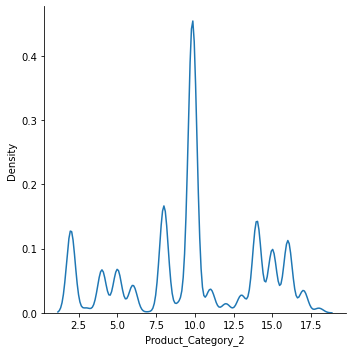

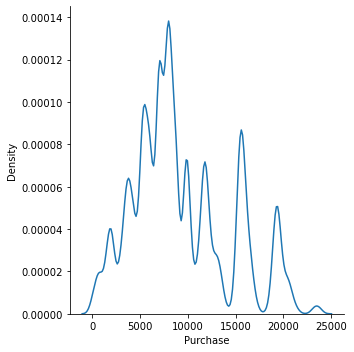

In [21]:
for i in data.select_dtypes(np.number).columns:
    sns.displot(x=data[i],kind='kde')
    plt.show()

In [22]:
data['Purchase'] = np.log(data['Purchase']) #since it follow a log normal distribution

In [23]:
pd.get_dummies(data,columns=['City_Category'])

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.027277,0,0,10,2,0,3,9.844506,9.032409,train,1,0,0
1,1000001,0.728995,0,0,10,2,0,1,6.000000,9.629051,train,1,0,0
2,1000001,-0.843742,0,0,10,2,0,12,9.844506,7.259820,train,1,0,0
3,1000001,-0.867172,0,0,10,2,0,12,14.000000,6.963190,train,1,0,0
4,1000002,1.085326,1,6,16,4,0,8,9.844506,8.983314,train,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.540129,0,2,15,4,1,8,9.844506,NaN,test,0,1,0
233595,1006036,0.784641,0,2,15,4,1,5,8.000000,NaN,test,0,1,0
233596,1006036,-1.390442,0,2,15,4,1,1,5.000000,NaN,test,0,1,0
233597,1006037,-0.483507,0,4,1,4,0,10,16.000000,NaN,test,0,0,1


In [24]:
train = data[data['Source']=='train'].drop(columns = ['Source'])

In [25]:
test = data[data['Source']=='test'].drop(columns = ['Source','Purchase'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = 'Purchase'),
                                                    train['Purchase'],
                                                    test_size=0.2,
                                                    random_state=0)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

# Model Building

**Linear Regression**

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [30]:
print('r2 score is {:.2f} on training and {:.2f} on testing'.format(r2_score(y_train,y_train_pred),
                                                                    r2_score(y_test,y_pred)))
print('mean absolute error is {:.2f} on training and {:.2f} on testing'.format(mean_absolute_error(y_train,y_train_pred),
                                                                    mean_absolute_error(y_test,y_pred)))
print('root squared error is {:.2f} on training and {:.2f} on testing'.format((mean_squared_error(y_train,y_train_pred)),
                                                                    (mean_squared_error(y_test,y_pred))))
print('root mean squared error is {:.2f} on training and {:.2f} on testing'.format(np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                                                    np.sqrt(mean_squared_error(y_test,y_pred))))

r2 score is 0.20 on training and 0.20 on testing
mean absolute error is 0.45 on training and 0.46 on testing
root squared error is 0.44 on training and 0.44 on testing
root mean squared error is 0.66 on training and 0.67 on testing


r2_score is low and rmse is highish. So, the model is not performing well

**DecisionTreeRegressor**

In [31]:
model = DecisionTreeRegressor(max_depth=12)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12)

In [32]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [33]:
print('r2 score is {:.2f} on training and {:.2f} on testing'.format(r2_score(y_train,y_train_pred),
                                                                    r2_score(y_test,y_pred)))
print('mean absolute error is {:.2f} on training and {:.2f} on testing'.format(mean_absolute_error(y_train,y_train_pred),
                                                                    mean_absolute_error(y_test,y_pred)))
print('root squared error is {:.2f} on training and {:.2f} on testing'.format((mean_squared_error(y_train,y_train_pred)),
                                                                    (mean_squared_error(y_test,y_pred))))
print('root mean squared error is {:.2f} on training and {:.2f} on testing'.format(np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                                                    np.sqrt(mean_squared_error(y_test,y_pred))))

r2 score is 0.77 on training and 0.76 on testing
mean absolute error is 0.26 on training and 0.27 on testing
root squared error is 0.13 on training and 0.13 on testing
root mean squared error is 0.36 on training and 0.36 on testing


The Decission Tree Regressor is performing better than the linear regression model

**RandomForestRegressor**

In [34]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [36]:
print('r2 score is {:.2f} on training and {:.2f} on testing'.format(r2_score(y_train,y_train_pred),
                                                                    r2_score(y_test,y_pred)))
print('mean absolute error is {:.2f} on training and {:.2f} on testing'.format(mean_absolute_error(y_train,y_train_pred),
                                                                    mean_absolute_error(y_test,y_pred)))
print('root squared error is {:.2f} on training and {:.2f} on testing'.format((mean_squared_error(y_train,y_train_pred)),
                                                                    (mean_squared_error(y_test,y_pred))))
print('root mean squared error is {:.2f} on training and {:.2f} on testing'.format(np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                                                    np.sqrt(mean_squared_error(y_test,y_pred))))

r2 score is 0.97 on training and 0.78 on testing
mean absolute error is 0.10 on training and 0.26 on testing
root squared error is 0.02 on training and 0.12 on testing
root mean squared error is 0.13 on training and 0.35 on testing


Since RandomForestRegressor is the best model out of three, using it for prediction.

**HyperParameter Tuning**

In [37]:
params = {
 'max_depth': [10, 5],
 'min_samples_leaf': [5,10],
 'min_samples_split': [ 10, 15],
 'n_estimators': [100, 150]}

In [38]:
grid = GridSearchCV(RandomForestRegressor(), param_grid= params, cv = 3, n_jobs = -1, verbose = 10)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 5], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15],
                         'n_estimators': [100, 150]},
             verbose=10)

In [39]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [40]:
model = grid.best_estimator_
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [41]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [42]:
print('r2 score is {:.2f} on training and {:.2f} on testing'.format(r2_score(y_train,y_train_pred),
                                                                    r2_score(y_test,y_pred)))
print('mean absolute error is {:.2f} on training and {:.2f} on testing'.format(mean_absolute_error(y_train,y_train_pred),
                                                                    mean_absolute_error(y_test,y_pred)))
print('root squared error is {:.2f} on training and {:.2f} on testing'.format((mean_squared_error(y_train,y_train_pred)),
                                                                    (mean_squared_error(y_test,y_pred))))
print('root mean squared error is {:.2f} on training and {:.2f} on testing'.format(np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                                                    np.sqrt(mean_squared_error(y_test,y_pred))))

r2 score is 0.76 on training and 0.76 on testing
mean absolute error is 0.27 on training and 0.27 on testing
root squared error is 0.13 on training and 0.13 on testing
root mean squared error is 0.36 on training and 0.36 on testing


In [43]:
predictions = model.predict(test)